# Titanic Data Analysis
in this project i work on Titanic data and try to figure out questions like what factor made people more likely to survive and others 

## Reading data 

In [20]:
import unicodecsv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = 'C:\\Users\\aemra\\Documents\\Python\\Nanodegree\\Project 2'
os.chdir(path)

In [21]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic_df.describe()

C:\Users\aemra\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Question 1 : What factor made people more likely to survive?
### Survuve and Sex relation

In [23]:
#Standarilizng the data Survive
def standardize_colum(column):
    return (column-column.mean())/column.std()

In [24]:
standardize_colum(titanic_df['Survived']).describe()

count    8.910000e+02
mean     1.903951e-16
std      1.000000e+00
min     -7.888293e-01
25%     -7.888293e-01
50%     -7.888293e-01
75%      1.266279e+00
max      1.266279e+00
Name: Survived, dtype: float64

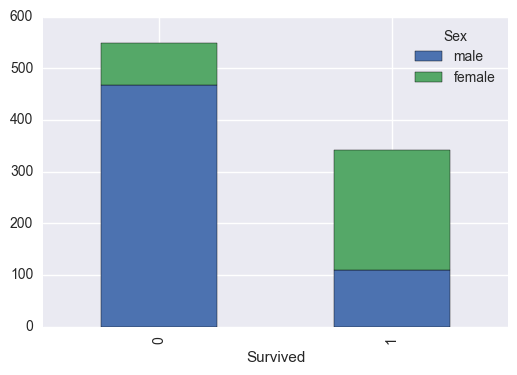

In [25]:
df1=(titanic_df.groupby(['Survived', 'Sex'])).count().unstack('Sex').fillna(0)['PassengerId']
df1[['male', 'female']].plot(kind='bar', stacked=True)
plt.show()

***

as we can see most of the people who survive is females but this is not enough to make comment on this part of data

***



In [26]:
total_gender=titanic_df.groupby('Sex').size()
port_class_groups=titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()*100/total_gender
print (port_class_groups)

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
dtype: float64


according to this data, we can say that famales are more likely to be survive ofcorse we cannot still say the true reason but it might be :
    * Females might moved to liveboat firstly than the males... 
    * usualy in Emergency stuatin childs and womans exit first
##### to check this statment we need to see the ages and gender effect on surviving


In [27]:
data_by_age=titanic_df.groupby(['Age', 'Survived'], as_index=False).mean()
data_by_age.head()['Age']

0    0.42
1    0.67
2    0.75
3    0.83
4    0.92
Name: Age, dtype: float64

Populating the interactive namespace from numpy and matplotlib


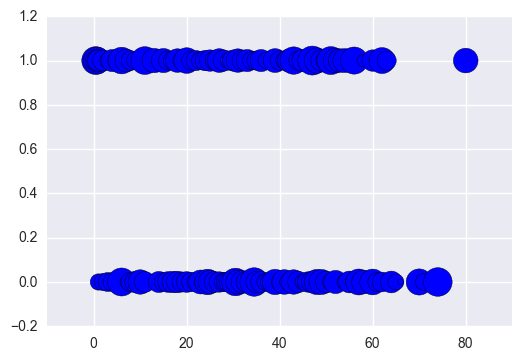

In [28]:
%pylab inline
plt.scatter(data_by_age['Age'],data_by_age['Survived'],s=data_by_age['PassengerId']/2)

# Age and Survived

### ages criteria

###### 0-19  --> Young
###### 20-39 --> Middle
###### 40-80 --> Old 

In [29]:
def agetoLetter(num):
    if num<20:
        return "Y"
    elif num>19 and num<40:
        return "M"
    else:
        return "O"

In [30]:
titanic_df['Age']=titanic_df['Age'].apply(agetoLetter)

In [31]:
age_gender=titanic_df.groupby(['Age','Sex','Survived'])['PassengerId'].count().unstack('Age')
age_gender

Age                M    O   Y
Sex    Survived              
female 0          30   29  22
       1         102   78  53
male   0         207  198  63
       1          48   35  26

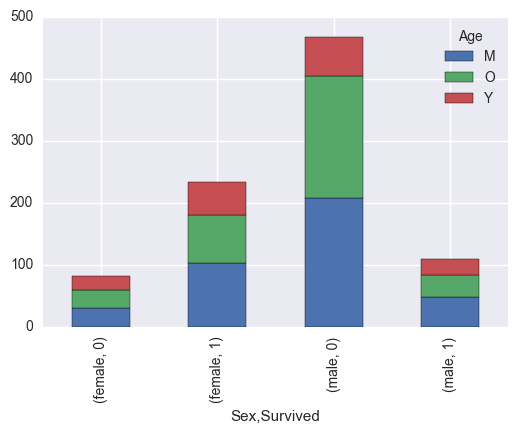

In [32]:
age_gender.plot(kind='bar', stacked=True)
plt.show()

###     
### Embarked might be another factor

In [33]:
df2 = titanic_df.groupby(['Embarked','Survived', 'Pclass'])['PassengerId'].count().unstack('Survived').fillna(0)

df2

Survived           0   1
Embarked Pclass         
C        1        26  59
         2         8   9
         3        41  25
Q        1         1   1
         2         1   2
         3        45  27
S        1        53  74
         2        88  76
         3       286  67

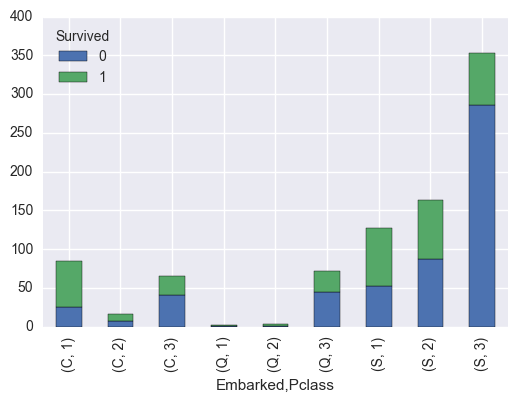

In [34]:
df2[[0, 1]].plot(kind='bar', stacked=True)
plt.show()

### cabin and survive relation

In [35]:
cabin_survive=titanic_df.groupby(['Cabin', 'Survived'])['PassengerId'].count().unstack('Cabin')

In [36]:
total_per_embarkation_port = titanic_df.groupby('Embarked').size()
port_class_groups = titanic_df.groupby(['Embarked','Pclass'], as_index=False).size()*100 / total_per_embarkation_port
port_class_groups

Embarked  Pclass
C         1         50.595238
          2         10.119048
          3         39.285714
Q         1          2.597403
          2          3.896104
          3         93.506494
S         1         19.720497
          2         25.465839
          3         54.813665
dtype: float64